# Part I - Ford GoBike System Data Exploration
## by Olufemi Ayo-Oladaye

## Introduction
> This is a dataset for individual rides made in a bike-sharing system in San Francisco Bay area.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Loading in dataset.


In [2]:
dataset = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
dataset.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
dataset.shape

(183412, 16)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


Datatype to be corrected for start_time and end_time columns

In [6]:
dataset.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


Average user is 38 years, average ride duration is 12 mins 6 secs 

In [7]:
dataset['bike_share_for_all_trip'].value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

#### I am interested in users that opt for bike sharing

In [8]:
df = dataset[dataset['bike_share_for_all_trip'] == 'Yes']

In [9]:
df['user_type'].value_counts()

Subscriber    17359
Name: user_type, dtype: int64

All users that want shared rides are subscribers

In [10]:
df['member_gender'].value_counts()

Male      13111
Female     3600
Other       648
Name: member_gender, dtype: int64

In [11]:
df.shape

(17359, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17359 entries, 4 to 183409
Data columns (total 16 columns):
duration_sec               17359 non-null int64
start_time                 17359 non-null object
end_time                   17359 non-null object
start_station_id           17346 non-null float64
start_station_name         17346 non-null object
start_station_latitude     17359 non-null float64
start_station_longitude    17359 non-null float64
end_station_id             17346 non-null float64
end_station_name           17346 non-null object
end_station_latitude       17359 non-null float64
end_station_longitude      17359 non-null float64
bike_id                    17359 non-null int64
user_type                  17359 non-null object
member_birth_year          17359 non-null float64
member_gender              17359 non-null object
bike_share_for_all_trip    17359 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 2.3+ MB


No info on start station for some users

In [13]:
#change datatype of start_time and end_time columns
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17359 entries, 4 to 183409
Data columns (total 16 columns):
duration_sec               17359 non-null int64
start_time                 17359 non-null datetime64[ns]
end_time                   17359 non-null datetime64[ns]
start_station_id           17346 non-null float64
start_station_name         17346 non-null object
start_station_latitude     17359 non-null float64
start_station_longitude    17359 non-null float64
end_station_id             17346 non-null float64
end_station_name           17346 non-null object
end_station_latitude       17359 non-null float64
end_station_longitude      17359 non-null float64
bike_id                    17359 non-null int64
user_type                  17359 non-null object
member_birth_year          17359 non-null float64
member_gender              17359 non-null object
bike_share_for_all_trip    17359 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 2.3+ MB


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [14]:
#check data without info of start station
df[df['start_station_id'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
4070,585,2019-02-28 16:28:45.934,2019-02-28 16:38:31.332,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.131,2019-02-28 12:38:46.329,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
13945,399,2019-02-27 14:06:51.772,2019-02-27 14:13:31.672,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,3975,Subscriber,1995.0,Male,Yes
14073,402,2019-02-27 13:37:01.864,2019-02-27 13:43:44.360,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,3975,Subscriber,1995.0,Male,Yes
24429,806,2019-02-25 18:11:33.034,2019-02-25 18:24:59.531,NaN,NaN,37.41,-121.94,NaN,NaN,37.41,-121.94,4189,Subscriber,1994.0,Female,Yes
36241,170,2019-02-23 16:44:30.435,2019-02-23 16:47:20.633,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1994.0,Female,Yes
46229,411,2019-02-22 10:05:15.468,2019-02-22 10:12:07.129,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.95,4162,Subscriber,1990.0,Female,Yes
55542,235,2019-02-21 10:02:11.532,2019-02-21 10:06:07.131,NaN,NaN,37.39,-121.93,NaN,NaN,37.39,-121.93,4249,Subscriber,1994.0,Male,Yes
106166,216,2019-02-13 18:47:22.967,2019-02-13 18:50:59.807,NaN,NaN,37.42,-121.94,NaN,NaN,37.42,-121.94,4162,Subscriber,2000.0,Female,Yes
110257,100,2019-02-12 18:14:05.926,2019-02-12 18:15:46.667,NaN,NaN,37.42,-121.94,NaN,NaN,37.42,-121.94,4162,Subscriber,1999.0,Male,Yes


In [15]:
#drop rows that don't have info on start station
df_null_index = df[df['start_station_id'].isnull()].index
df.drop(df_null_index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17346 entries, 4 to 183409
Data columns (total 16 columns):
duration_sec               17346 non-null int64
start_time                 17346 non-null datetime64[ns]
end_time                   17346 non-null datetime64[ns]
start_station_id           17346 non-null float64
start_station_name         17346 non-null object
start_station_latitude     17346 non-null float64
start_station_longitude    17346 non-null float64
end_station_id             17346 non-null float64
end_station_name           17346 non-null object
end_station_latitude       17346 non-null float64
end_station_longitude      17346 non-null float64
bike_id                    17346 non-null int64
user_type                  17346 non-null object
member_birth_year          17346 non-null float64
member_gender              17346 non-null object
bike_share_for_all_trip    17346 non-null object
dtypes: datetime64[ns](2), float64(7), int64(2), object(5)
memory usage: 2.2+ MB


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [16]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000,17346.000000
mean,683.997521,215.680387,37.642773,-122.175309,215.408740,37.642748,-122.175563,4378.728525,1986.505419
std,1600.126359,105.776368,0.231886,0.221736,105.653995,0.231700,0.221877,1539.434135,12.446377
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,12.000000,1900.000000
25%,280.000000,129.000000,37.337122,-122.398285,129.000000,37.337122,-122.397437,3828.000000,1980.000000
50%,438.000000,249.000000,37.776513,-122.260553,249.000000,37.776513,-122.261928,4646.000000,1992.000000
75%,702.000000,296.000000,37.819381,-121.892844,296.000000,37.819381,-121.892844,5413.000000,1995.000000
max,83195.000000,398.000000,37.880222,-121.874119,389.000000,37.880222,-121.874119,6645.000000,2000.000000


### What is the structure of your dataset?

> The dataset initially had 183,412 rows and 16 columns but I streamlined it into a datasef with 17,359 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest is to consider different factors to aid planning of effective bike sharing.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> We have filtered the bike_share_for_all_trip column to find out users that are willing to share rides. We shall examine the other features of these users. Features that might help with the exploration are:
1. user_type column: number of users(subscribers) to plan for leaving reservation for additions(to get more users that might be willing to share rides)
2. member_birth_year: age range of users
3. member_gender: gender of users (some people might only be comfortable sharing rides with a specific gender)
4. duration_sec	column: average duration of rides for different classes of riders in the dataset
5. start_time & start_station_name columns: average time most riders start their rides, most populated start station; more riders might be needed in these locations and time

## Univariate Exploration



In [17]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
10,458,2019-02-28 23:57:57.211,2019-03-01 00:05:35.435,370.0,Jones St at Post St,37.787327,-122.413278,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,5318,Subscriber,1996.0,Female,Yes
15,208,2019-02-28 23:59:18.548,2019-03-01 00:02:47.228,349.0,Howard St at Mary St,37.781010,-122.405666,60.0,8th St at Ringold St,37.774520,-122.409449,6361,Subscriber,1993.0,Male,Yes
21,414,2019-02-28 23:50:26.879,2019-02-28 23:57:21.130,163.0,Lake Merritt BART Station,37.797320,-122.265320,221.0,6th Ave at E 12th St (Temporary Location),37.794396,-122.253842,6007,Subscriber,1984.0,Male,Yes
30,163,2019-02-28 23:50:45.698,2019-02-28 23:53:29.569,238.0,MLK Jr Way at University Ave,37.871719,-122.273068,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5669,Subscriber,1996.0,Male,Yes


#### Average duration of rides

In [18]:
df['duration_sec'].mean()

683.99752104231527

#### What time of the day is populated with the most users?

In [19]:
df['start_time'].dt.hour.value_counts()

17    1560
16    1322
18    1231
15    1225
14    1216
12    1143
13    1072
11    1039
19    1028
9     1012
10     989
20     832
8      785
21     741
22     508
7      474
23     286
6      254
0      161
1      139
5      125
2      122
3       51
4       31
Name: start_time, dtype: int64

In [20]:
df['end_time'].dt.hour.value_counts()

17    1570
16    1324
18    1287
15    1200
14    1177
12    1147
13    1095
19    1046
9     1036
10     988
11     961
20     862
21     801
8      694
22     529
7      433
23     321
6      234
0      165
1      139
2      135
5      117
3       56
4       29
Name: end_time, dtype: int64

#### What day of the week is populated with the most users?

In [21]:
df['trip_day'] = df['start_time'].dt.dayofweek
df['trip_day'].value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


3    3107
1    2755
2    2597
4    2507
0    2402
5    2036
6    1942
Name: trip_day, dtype: int64

In [22]:
df['trip_day'].replace(to_replace=[0,1,2,3,4,5,6], value=["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"], inplace = True)
df['trip_day'].value_counts()

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Thur    3107
Tue     2755
Wed     2597
Fri     2507
Mon     2402
Sat     2036
Sun     1942
Name: trip_day, dtype: int64

#### What station is populated with most users?

In [23]:
df['start_station_name'].value_counts().nlargest(7)

5th St at Virginia St            944
San Fernando St at 4th St        804
San Fernando St at 7th St        611
Bancroft Way at Telegraph Ave    503
Bancroft Way at College Ave      474
Ryland Park                      352
San Salvador St at 9th St        350
Name: start_station_name, dtype: int64

In [24]:
df['end_station_name'].value_counts().nlargest(7)

5th St at Virginia St            905
San Fernando St at 4th St        831
San Fernando St at 7th St        657
Bancroft Way at Telegraph Ave    528
San Salvador St at 9th St        366
Ryland Park                      355
2nd St at Julian St              293
Name: end_station_name, dtype: int64

#### What is the gender distribution of users?

In [25]:
df['member_gender'].value_counts()

Male      13104
Female     3594
Other       648
Name: member_gender, dtype: int64

#### What is the age distribution of users?

In [26]:
df['start_time'].dt.year.value_counts()

2019    17346
Name: start_time, dtype: int64

In [27]:
df['member_age'] = 2019 - df['member_birth_year']
df['member_age'] = df['member_age'].astype(int)
df['member_age'].value_counts()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


24     1955
26     1742
25     1495
23     1090
27      879
22      803
21      649
29      574
28      536
20      511
30      491
35      386
39      385
45      354
43      333
47      327
42      264
38      264
62      248
31      247
52      241
19      239
44      239
32      233
37      220
56      217
41      206
33      183
51      179
54      178
40      174
48      161
49      150
55      137
58      127
46      109
63       97
36       94
34       91
57       83
74       81
53       71
72       41
70       38
50       37
60       29
119      27
66       23
86       20
59       17
64       14
61       11
65       10
69        8
76        7
80        7
67        6
68        6
73        2
Name: member_age, dtype: int64

In [28]:
df['member_age'].value_counts().sort_index()

19      239
20      511
21      649
22      803
23     1090
24     1955
25     1495
26     1742
27      879
28      536
29      574
30      491
31      247
32      233
33      183
34       91
35      386
36       94
37      220
38      264
39      385
40      174
41      206
42      264
43      333
44      239
45      354
46      109
47      327
48      161
49      150
50       37
51      179
52      241
53       71
54      178
55      137
56      217
57       83
58      127
59       17
60       29
61       11
62      248
63       97
64       14
65       10
66       23
67        6
68        6
69        8
70       38
72       41
73        2
74       81
76        7
80        7
86       20
119      27
Name: member_age, dtype: int64

Examine age group 119 years

In [29]:
df[df['member_age'] == 119]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,trip_day,member_age
1285,148,2019-02-28 19:29:17.627,2019-02-28 19:31:45.967,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5391,Subscriber,1900.0,Male,Yes,Thur,119
24042,194,2019-02-25 18:58:10.644,2019-02-25 19:01:25.308,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,6363,Subscriber,1900.0,Male,Yes,Mon,119
26133,410,2019-02-25 13:38:12.067,2019-02-25 13:45:02.207,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,176.0,MacArthur BART Station,37.828410,-122.266315,3311,Subscriber,1900.0,Male,Yes,Mon,119
32725,85,2019-02-24 13:49:52.142,2019-02-24 13:51:17.904,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5176,Subscriber,1900.0,Male,Yes,Sun,119
32942,169,2019-02-24 13:17:05.233,2019-02-24 13:19:54.375,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,5176,Subscriber,1900.0,Male,Yes,Sun,119
34747,180,2019-02-23 21:46:26.558,2019-02-23 21:49:26.839,174.0,Shattuck Ave at 51st St,37.836801,-122.264004,204.0,55th St at Telegraph Ave,37.840186,-122.261823,5743,Subscriber,1900.0,Male,Yes,Sat,119
38932,389,2019-02-23 10:49:33.547,2019-02-23 10:56:03.428,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,150.0,Adeline St at 40th St,37.831277,-122.278267,5435,Subscriber,1900.0,Male,Yes,Sat,119
41194,313,2019-02-22 18:55:09.207,2019-02-22 19:00:22.969,340.0,Harmon St at Adeline St,37.849735,-122.270582,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5619,Subscriber,1900.0,Male,Yes,Fri,119
41319,379,2019-02-22 18:43:07.018,2019-02-22 18:49:26.251,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,340.0,Harmon St at Adeline St,37.849735,-122.270582,5699,Subscriber,1900.0,Male,Yes,Fri,119
60960,339,2019-02-20 18:08:14.886,2019-02-20 18:13:54.858,177.0,MacArthur Blvd at Telegraph Ave,37.826286,-122.265100,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5121,Subscriber,1900.0,Male,Yes,Wed,119


No reason to suggest that the subset is in error but it is an outlier so it would be dropped.

In [30]:
df_119years_index = df[df['member_age'] == 119].index
df.drop(df_119years_index, inplace = True)
df['member_age'].value_counts().sort_index()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


19     239
20     511
21     649
22     803
23    1090
24    1955
25    1495
26    1742
27     879
28     536
29     574
30     491
31     247
32     233
33     183
34      91
35     386
36      94
37     220
38     264
39     385
40     174
41     206
42     264
43     333
44     239
45     354
46     109
47     327
48     161
49     150
50      37
51     179
52     241
53      71
54     178
55     137
56     217
57      83
58     127
59      17
60      29
61      11
62     248
63      97
64      14
65      10
66      23
67       6
68       6
69       8
70      38
72      41
73       2
74      81
76       7
80       7
86      20
Name: member_age, dtype: int64

In [31]:
df['duration_sec'].value_counts().sort_index()

61        4
62        5
63        5
64        6
65        5
66        5
67        8
68        7
69       12
70        4
71        8
72       10
73       11
74        7
75        8
76       16
77        7
78        5
79        6
80       11
81        7
82       17
83       12
84        9
85       10
86        5
87        6
88       12
89        9
90       15
         ..
10745     1
12481     1
12894     1
13609     1
13819     1
13886     1
14880     1
15486     1
15739     1
16655     1
16747     1
19687     1
21452     1
21883     1
22149     1
22225     1
24646     1
25313     1
25428     1
26988     1
28013     1
39759     1
45019     1
47559     1
49402     1
51488     1
60441     1
61119     1
63097     1
83195     1
Name: duration_sec, Length: 2367, dtype: int64

In [32]:
max = df['duration_sec'].max()
min = df['duration_sec'].min()
print(f'Max duration is {max}')
print(f'Min duration is {min}')

Max duration is 83195
Min duration is 61




>**Visualizations**

#### What time of the day is populated with the most users?

In [33]:
#define a function for plots
def plt_plot_function(dataset, xlabel = None, ylabel = None, ticks = None, labels = None, plot_type = 'bar', figsize = (8,5), 
                      alpha = 1):
    
    
    """
    Create a plot.
    
    This function contains codes that simply create a plot given different parameters to work with.

    Parameters
    ----------
    dataset : dataset to plot
    xlabel : label text, default value is None 
    ylabel : label text, default value is None
    ticks : values for x axis, default value is None
    labels : new values for x axis, default value is None
    plot_type : type of plot, default value is 'bar'
    figsize : size of chart, default value is (8,5)
    alpha : adjust the transparency of the plot, default value is 1
    
    """
        
    dataset.plot(kind = plot_type, figsize = figsize, alpha = alpha)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if ticks and labels:
        plt.xticks(ticks, labels);

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


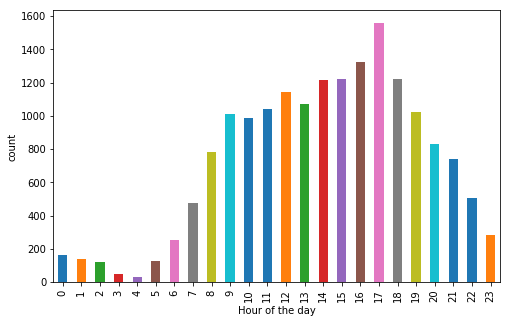

In [34]:
df['trip_time'] = df['start_time'].dt.hour
dataset = df['trip_time'].value_counts().sort_index()
plt_plot_function(dataset, 'Hour of the day', 'count')

Most rides start within the hours of 5pm and 6pm

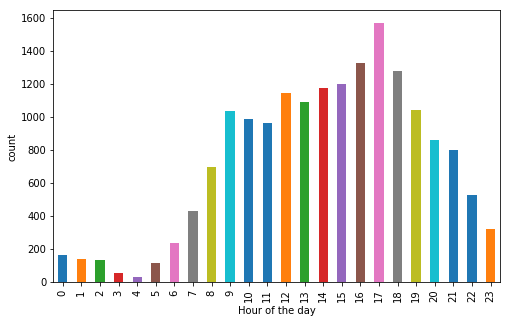

In [35]:
dataset = df['end_time'].dt.hour.value_counts().sort_index()
plt_plot_function(dataset, 'Hour of the day', 'count')

Most rides end within the hours of 5pm and 6pm

#### What day of the week is populated with the most users?

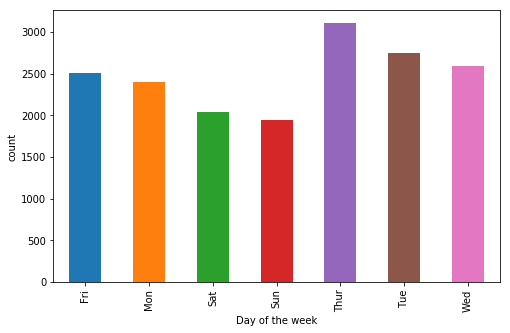

In [36]:
dataset = df['trip_day'].value_counts().sort_index()
plt_plot_function(dataset, 'Day of the week', 'count');

Thursdays are more populated with users than any other day

#### What station is populated with most users?

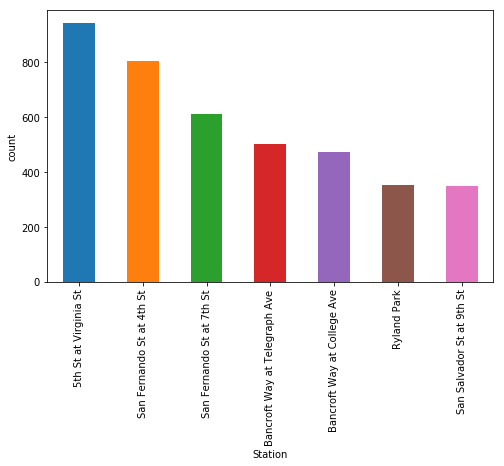

In [37]:
dataset = df['start_station_name'].value_counts().nlargest(7)
plt_plot_function(dataset, 'Station', 'count')

Most populated station with users is the 5th St at Virginia St

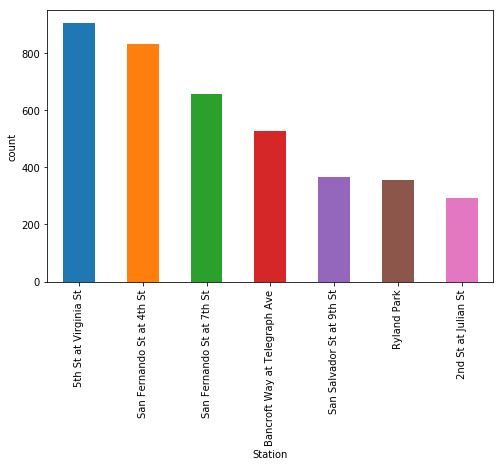

In [38]:
dataset = df['end_station_name'].value_counts().nlargest(7)
plt_plot_function(dataset, 'Station', 'count')

The same station 5th St at Virginia St is the destination for most users.
A lot of users start at stations where a lot of users end.

#### Examine the gender distribution of users

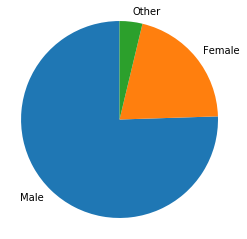

In [39]:
gender_counts = df['member_gender'].value_counts()
gender_counts
plt.pie(gender_counts, labels = gender_counts.index, startangle = 90)
plt.axis('square');

More males are comfortable sharing rides than females and other genders.

#### Examine age distribution of users

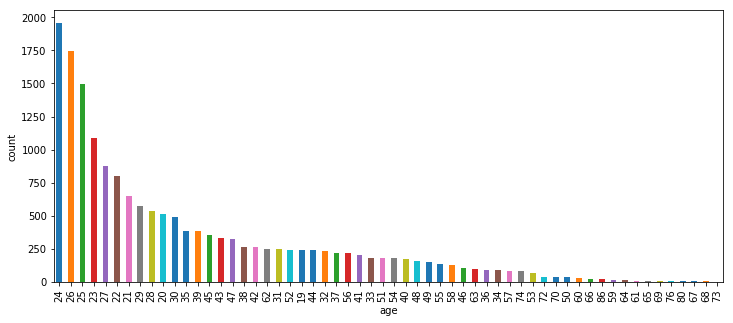

In [40]:
dataset = df['member_age'].value_counts()
plt_plot_function(dataset, 'age', 'count', figsize = (12,5))

Most users are 24 years

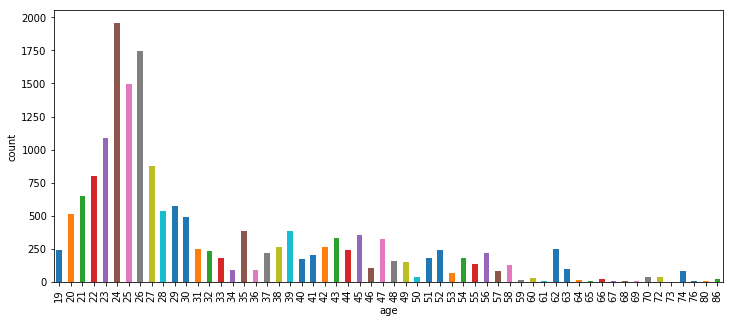

In [41]:
dataset = df['member_age'].value_counts().sort_index()
plt_plot_function(dataset, 'age', 'count', figsize = (12,5))

Most users are 24 years, 26 and 25 years, while user ages range from 19-86 years.

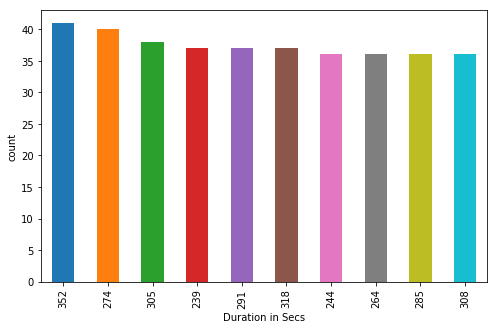

In [42]:
dataset = df['duration_sec'].value_counts().sort_index().nlargest(10)
plt_plot_function(dataset, 'Duration in Secs', 'count')

A lot of users' rides were 352 secs

In [43]:
df['duration_sec'].value_counts().sort_index()

61        4
62        5
63        5
64        6
65        5
66        5
67        8
68        7
69       12
70        4
71        8
72       10
73       11
74        7
75        8
76       16
77        7
78        5
79        6
80       11
81        7
82       17
83       12
84        9
85       10
86        5
87        6
88       12
89        9
90       15
         ..
10745     1
12481     1
12894     1
13609     1
13819     1
13886     1
14880     1
15486     1
15739     1
16655     1
16747     1
19687     1
21452     1
21883     1
22149     1
22225     1
24646     1
25313     1
25428     1
26988     1
28013     1
39759     1
45019     1
47559     1
49402     1
51488     1
60441     1
61119     1
63097     1
83195     1
Name: duration_sec, Length: 2367, dtype: int64

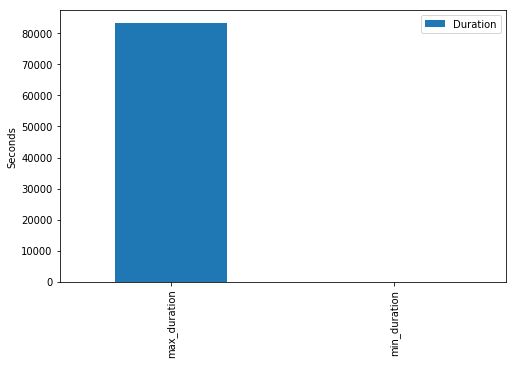

In [44]:
dataset = pd.DataFrame({'Attribute': ['max_duration', 'min_duration'], 'Duration': [83195, 61]})
plt_plot_function(dataset, ylabel = 'Seconds', ticks = [0,1], labels = ['max_duration', 'min_duration'])

Distribution between maximum and minimum rides duration

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I had the following observations in my univariate exploration:
1. A variable of interest was the 'member_birth_year' column which gave me info of when each user was born. I had this column transformed to 'age' by subtracting from the year the trips were taken (2019). 
2. Gender: I observed that some people either didn't identify as male or female, or would rather not state. This group is a small sample of my dataset and would not dispute the result I inferred.
3. Station name: The station where a the most number of users start their rides is also where a handful of others end theirs. This makes transportation planning easier.
4. Time: Most users take their rides at around 5pm

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

>  There was an outlier in my 'age' variable. I dropped rows for age 119 years as it might skew my analysis. 

## Bivariate Exploration



In [45]:
print(df['start_station_name'].value_counts().nlargest(10))
df['end_station_name'].value_counts().nlargest(10)

5th St at Virginia St            944
San Fernando St at 4th St        804
San Fernando St at 7th St        611
Bancroft Way at Telegraph Ave    503
Bancroft Way at College Ave      474
Ryland Park                      352
San Salvador St at 9th St        350
Hearst Ave at Euclid Ave         330
2nd St at Julian St              306
Haste St at Telegraph Ave        296
Name: start_station_name, dtype: int64


5th St at Virginia St            905
San Fernando St at 4th St        831
San Fernando St at 7th St        657
Bancroft Way at Telegraph Ave    528
San Salvador St at 9th St        366
Ryland Park                      355
2nd St at Julian St              293
Hearst Ave at Euclid Ave         258
Morrison Ave at Julian St        255
Bancroft Way at College Ave      248
Name: end_station_name, dtype: int64

In [46]:
station = df[df['start_station_name'].isin(['5th St at Virginia St', 'San Fernando St at 4th St', 'San Fernando St at 7th St', 
                                            'Bancroft Way at Telegraph Ave', 'Bancroft Way at College Ave', 'Ryland Park', 
                                            'San Salvador St at 9th St', 'Hearst Ave at Euclid Ave', '2nd St at Julian St', 
                                            'Haste St at Telegraph Ave']) 
             & df['end_station_name'].isin(['5th St at Virginia St', 'San Fernando St at 4th St', 'San Fernando St at 7th St', 
                                            'Bancroft Way at Telegraph Ave', 'San Salvador St at 9th St', 'Ryland Park', 
                                            '2nd St at Julian St', 'Hearst Ave at Euclid Ave', 'Morrison Ave at Julian St', 
                                            'Bancroft Way at College Ave'])]

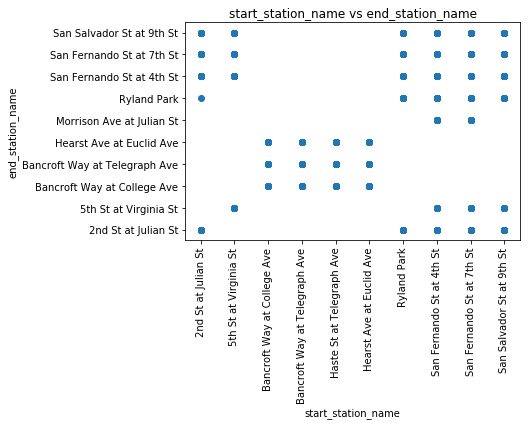

In [47]:
plt.scatter(station['start_station_name'], station['end_station_name'])
plt.xticks(rotation = 90);
plt.xlabel('start_station_name')
plt.ylabel('end_station_name')
plt.title('start_station_name vs end_station_name');


This shows a correlation between start and end stations (considering a part sample)

#### What age range takes longest bike rides?

In [48]:
df['duration_sec'].value_counts().sort_index()

61        4
62        5
63        5
64        6
65        5
66        5
67        8
68        7
69       12
70        4
71        8
72       10
73       11
74        7
75        8
76       16
77        7
78        5
79        6
80       11
81        7
82       17
83       12
84        9
85       10
86        5
87        6
88       12
89        9
90       15
         ..
10745     1
12481     1
12894     1
13609     1
13819     1
13886     1
14880     1
15486     1
15739     1
16655     1
16747     1
19687     1
21452     1
21883     1
22149     1
22225     1
24646     1
25313     1
25428     1
26988     1
28013     1
39759     1
45019     1
47559     1
49402     1
51488     1
60441     1
61119     1
63097     1
83195     1
Name: duration_sec, Length: 2367, dtype: int64

In [49]:
#define a function for scatter plots
def plt_scatter_function(x, y, alpha = 1, xlabel = None, ylabel = None, axis = None, title = None, ylim = None, figsize = None):
    
    """
    Create a scatter plot.
    
    This function contains codes that simply create a scatter plot given different parameters to work with.

    Parameters
    ----------
    x : dataset for x axis
    y : dataset for y axis
    alpha : adjust the transparency of the plot, default value is 1
    xlabel : label text, default value is None 
    ylabel : label text, default value is None
    axis : range for values on x and y axes (min and max values for x and y), default value is None
    title : title text, default value is None
    ylim : range of values for y axis, default value is None
    figsize : size of plot, default value is None

    """
    
    plt.scatter(x, y, alpha = alpha)
    if axis:
        plt.axis(axis)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)
    if title:
        plt.title(title)
    if ylim:
        plt.ylim(ylim)
    if figsize:
        plt.figure(figsize = figsize)
    plt.show();

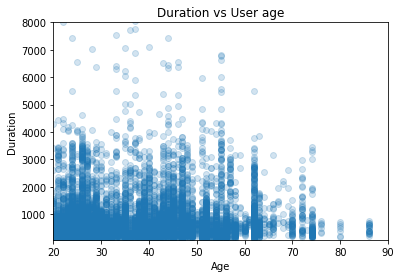

In [50]:
plt_scatter_function(df['member_age'], df['duration_sec'], alpha = 0.2, axis =[20, 90, 60, 8000], xlabel = 'Age', 
                     ylabel = 'Duration', title = 'Duration vs User age')

Younger users' trips take fairly longer than the older users' trips

#### What gender rides longer?

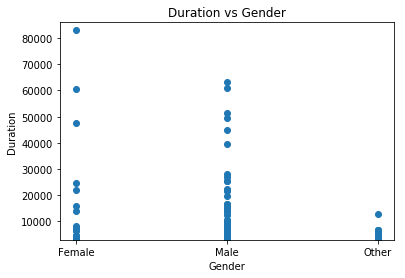

In [51]:
plt_scatter_function(df['member_gender'], df['duration_sec'], xlabel = 'Gender', ylabel = 'Duration', 
                     title = 'Duration vs Gender', ylim = [3000,86000])

Highest duration of rides are by female users

#### Age range of users against days of the week

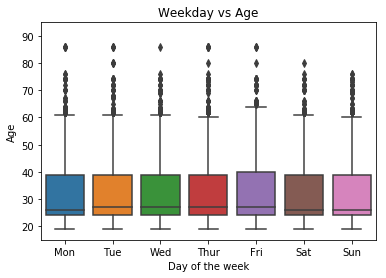

In [52]:
sb.boxplot(df['trip_day'], df['member_age'], order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of the week')
plt.ylabel('Age')
plt.ylim((15,95))
#ylim reduced because of skewed data
plt.title('Weekday vs Age');

Older users hardly travel during the weekends.

#### What day of the week do users have more trip durations?

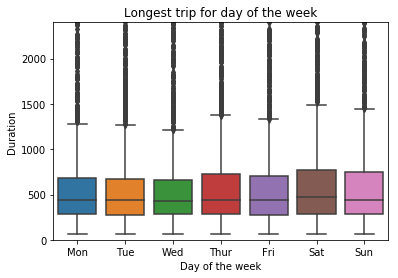

In [53]:
sb.boxplot(df['trip_day'], df['duration_sec'], order = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
plt.xlabel('Day of the week')
plt.ylabel('Duration')
plt.ylim((0,2400))
#ylim reduced because of skewed data
plt.title('Longest trip for day of the week');

Longer trips are taken on weekends

#### What time does each age range take their trips?

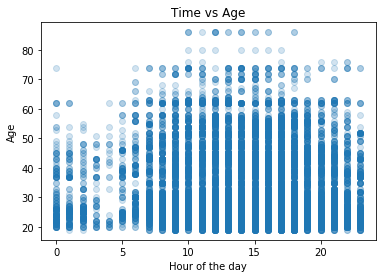

In [59]:
x_dataset = df['end_time'].dt.hour
plt_scatter_function(x_dataset, df['member_age'], alpha = 0.2, xlabel = 'Hour of the day', ylabel = 'Age', 
                     title = 'Time vs Age', figsize = (9,6))

Older people travel less early in the morning and late evenings

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Young users take longer trips than older users. Older users take shorter trips. Older users don't take trips during weekends. There is increased duration of trips during weekends.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Most trips are taken on thursdays but Longer trips are taken during weekends

## Multivariate Exploration


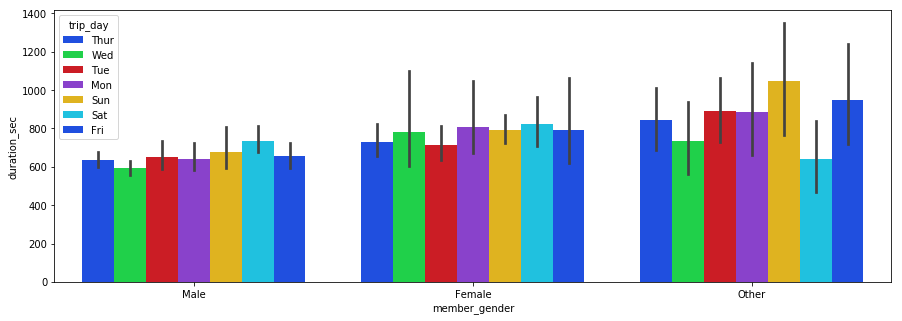

In [60]:
sb.barplot( x='member_gender', y='duration_sec', data=df, color='blue',  hue='trip_day' , palette='bright')
plt.gcf().set_size_inches(15, 5);

Other gender take longer trips, Females take relatively longer trips than males

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Females' trips take longer time than males.

### Were there any interesting or surprising interactions between features?

> From univariate visualisation, the least number of trips happen on sundays but we are finding out that trpis on Sundays take longer duration. That could be the reason why the number of trips are reduces.

## Conclusions
> I first isolated users that opted for bike sharing and I found out that they are all subscribers, most of them are males, most of them are 24 years.

> I found out that average duration per ride is 684 secs, females take the longest rides, weekend rides are usually longest, younger users take longest rides. It can be drawn that females form a good percentage of young users, old people take shorter rides.

> I found out that most users take rides on Thursdays, most users takes rides between 5pm and 6pm everyday. It can be drawn that more bikes are used during these periods, especially on Thursdays.

> I found out that most old people don't take rides very early in the mornings, late in the evenings and weekends. It can be drawn that old people mostly travel in the day on weekdays.

> I found out that highly populated start stations are also highly populated end stations. There was a correlation between these stations. It can be drawn that stations that have high number of users that want to take trips also have high offloading of other users.


### I had help from python libraries documentations, stackoverflow.com, geeksforgeeks.org, dataquest.io.